In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from MNIST_helper import plot_numbers
from cnn_models import get_model, get_model_2, get_model_3, get_model_4, get_model_5
from keras import optimizers

Using TensorFlow backend.


In [4]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_test = x_test_.reshape(x_test_.shape + (1,))
y_test_categorical = to_categorical(y_test[:,0])

In [5]:
adam = optimizers.Adam(lr=0.001, decay=0.00001) #decay=1e-4

# Modelo entrenado sin imagenes en blanco y negro

## Imagenes sin invertir

In [6]:
model_1 = get_model()
model_1.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_1.load_weights('cnn-1.hdf5')
model_1.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 12s 1ms/step


[0.21586907600164412, 0.92659999999999998]

## Imagenes invertidas

In [7]:
model_1.evaluate((255-x_test.reshape(-1,28,28)).reshape(-1,28,28,1), y_test_categorical)

10000/10000 [==============================] - 12s 1ms/step


[3.7881355941772461, 0.27479999999999999]

# Modelo entrenado con imagenes invertidas y sin invertir

# Imagenes sin invertir

In [8]:
model_bw = get_model()
model_bw.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_bw.load_weights('cnn-bw.hdf5')
model_bw.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 11s 1ms/step


[0.21148282349407674, 0.93059999999999998]

# Imagenes invertidas

In [9]:
model_bw.evaluate((255-x_test.reshape(-1,28,28)).reshape(-1,28,28,1), y_test_categorical)

10000/10000 [==============================] - 12s 1ms/step


[0.21426572446227074, 0.92959999999999998]

# Ver imagenes erradas

In [45]:
labels_dict = {
    0:'T-shirt/top', 
       1:'Trouser', 
       2:'Pullover', 
       3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9:'Ankle boot',
    }

In [10]:
predicted = model_bw.predict(x_test)

In [156]:
wrong_indexes = (np.argmax(predicted, axis=1)!=np.argmax(y_test_categorical, axis=1))
wrong_images = x_test[wrong_indexes]
wrong_pred_labels = np.argmax(predicted[wrong_indexes], axis = 1)
ground_truth_wrong = np.argmax(y_test_categorical[wrong_indexes], axis = 1)
wrong_images.shape

(694, 28, 28, 1)

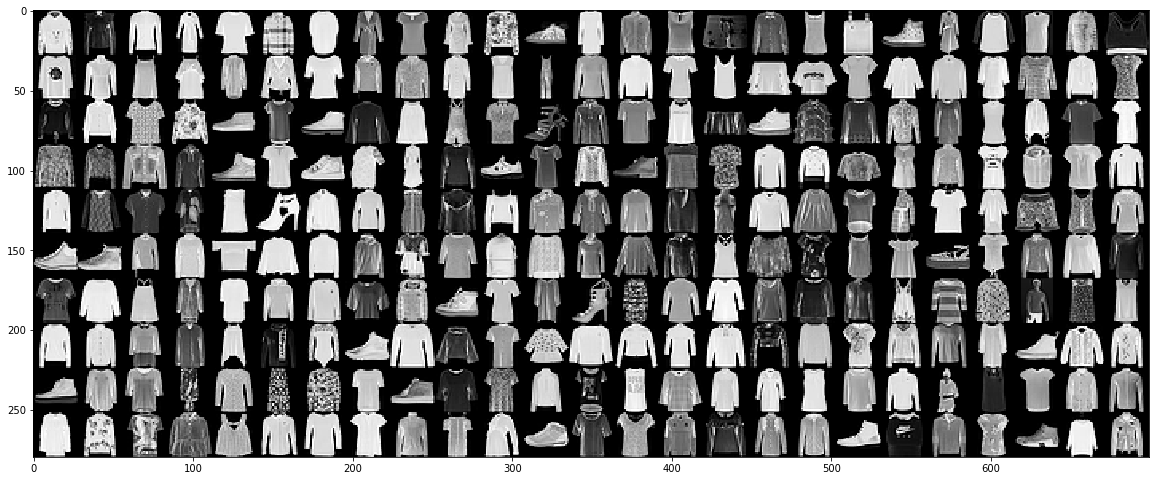

In [159]:
from MNIST_helper import plot_numbers
plot_numbers(wrong_images.reshape(-1,28,28),range(250), columns=25, figsize=(20, 20))

In [160]:
print('\tPredicted \t\t\tTruth')
for i in range(len(wrong_indexes))[:20]:
    print(str(i+1)+'\t' +labels_dict[wrong_pred_labels[i]]+'\t\t\t'+ labels_dict[ground_truth_wrong[i]])

	Predicted 			Truth
1	Coat			Pullover
2	Coat			Shirt
3	Pullover			Coat
4	Dress			Coat
5	T-shirt/top			Shirt
6	Coat			Shirt
7	Coat			T-shirt/top
8	Dress			Coat
9	T-shirt/top			Shirt
10	Coat			Dress
11	Coat			Pullover
12	Sneaker			Ankle boot
13	Dress			Coat
14	Shirt			Coat
15	Shirt			T-shirt/top
16	Bag			Trouser
17	Coat			Shirt
18	T-shirt/top			Shirt
19	T-shirt/top			Bag
20	Ankle boot			Sneaker


Los detecto como: Sneaker (34)


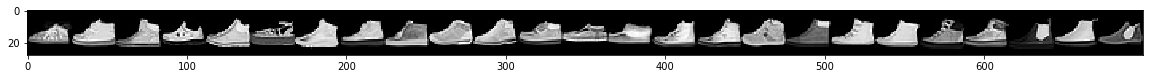

Estaban etiquetados como:
['Ankle boot', 'Ankle boot', 'Ankle boot', 'Sandal', 'Ankle boot', 'Sandal', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Sandal', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Sandal']


In [164]:
item = 7
item_indexes = (wrong_pred_labels == item)
wrong_item_images = wrong_images[item_indexes]
print('Los detecto como: '+labels_dict[item],'('+ str(len(wrong_item_images))+')')

plot_numbers(wrong_item_images.reshape(-1,28,28),range(min(25, len(wrong_item_images))), columns=min(25, len(wrong_item_images)), figsize=(20, 20))
print('Estaban etiquetados como:')
print(list(map(labels_dict.get,ground_truth_wrong[item_indexes] )))

Eran: Sandal (10)


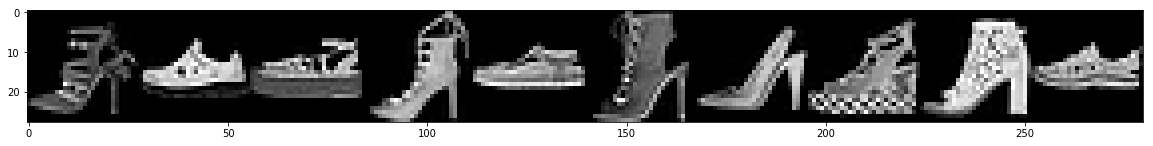

Los detecto como:
['Ankle boot', 'Sneaker', 'Sneaker', 'Ankle boot', 'Sneaker', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Sneaker']


In [175]:
item = 5
item_indexes = (ground_truth_wrong == item)
wrong_item_images = wrong_images[item_indexes]
print('Eran: '+labels_dict[item],'('+ str(len(wrong_item_images))+')')

plot_numbers(wrong_item_images.reshape(-1,28,28),range(min(25, len(wrong_item_images))), columns=min(25, len(wrong_item_images)), figsize=(20, 20))
print('Los detecto como:')
print(list(map(labels_dict.get,wrong_pred_labels[item_indexes] )))